In [2]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw


g++-12 -std=c++17 -Wall -O3 -o help Newtonian.cpp


In [3]:
def plot_loglog(ax, tot_clust):
    x = np.linspace(1, len(tot_clust), (len(tot_clust)))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, tot_clust)
    ax.plot(x, tot_clust, '+')

def plot_samplex(ax, clusters):
    list = np.zeros(len(clusters))
    for i in range(len(clusters)):
        list[i] = np.sum(clusters[i:])/np.sum(clusters)
    ax.set_xscale('log')
    ax.set_yscale('log')
    x = np.linspace(1, len(list), len(list))
    ax.plot(x, list)
    return x, list

def plot_ccdf1(ax, tot_clust):
    N = len(tot_clust)
    x = np.sort(tot_clust) 
    y = np.arange(N) / float(N)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, 1-y)

def plot_ccdf2(ax, tot_clust, dens=False):
    count, bins_count = np.histogram(tot_clust, bins=np.logspace(0, np.log10(len(tot_clust)), 5000), density=dens)
    pdf = count / sum(count) 
    cdf = np.cumsum(pdf)
    ccdf = 1 - cdf
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(bins_count[1:], ccdf)
    return bins_count[1:], ccdf

def pl(x, a, b):
    return a * np.power(x, -b)

def fit_pl(x, y):
    return scipy.optimize.curve_fit(power_law, x, y)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than

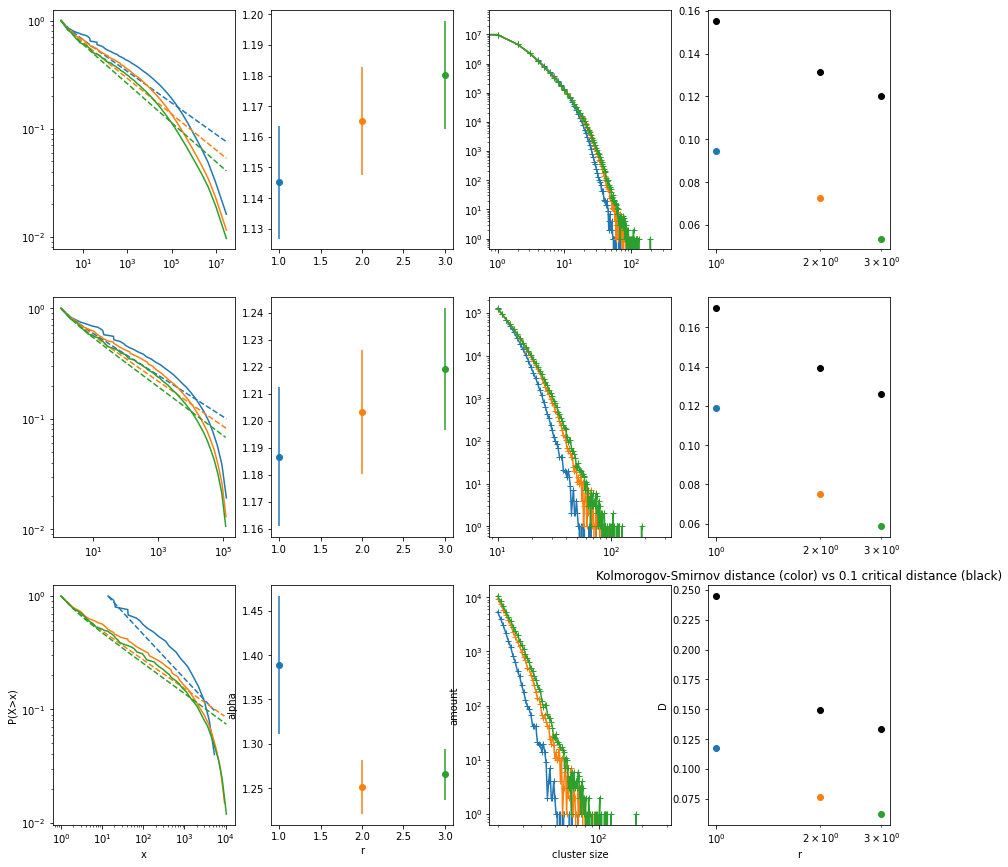

In [48]:
r_list = [2, 3, 4]
cutoff = [300,300,300]
bound_list = [0,10,20]
fig, ax = plt.subplots(3, 4, figsize=(15, 15))

ax[2][2].set_xscale('log')
ax[2][2].set_yscale('log')

ax[2][0].set_xlabel('x')
ax[2][0].set_ylabel('P(X>x)')

ax[2][1].set_xlabel('r')
ax[2][1].set_ylabel('alpha')

ax[2][2].set_xlabel('cluster size')
ax[2][2].set_ylabel('amount')

ax[2][3].set_xlabel('r')
ax[2][3].set_ylabel('D')
ax[2][3].title.set_text('Kolmorogov-Smirnov distance (color) vs 0.1 critical distance (black)')

alpha_list = []
p_list = []
err = []
cmap = plt.get_cmap("tab10")
for k, l in enumerate(bound_list):
    for i, j in zip(r_list, cutoff):
        ax[k][2].set_xscale('log')
        ax[k][2].set_yscale('log')
        size, amount = np.loadtxt("R{}_PA_0.800000.txt".format(i), skiprows=1, unpack=True)
        amount = amount[l:j]
        i = i-1
        result = powerlaw.Fit(amount, discrete=True)
        result.plot_ccdf(color=cmap(i-1), label=i, ax=ax[k][0])
        result.power_law.plot_ccdf(color=cmap(i-1), linestyle='--', ax=ax[k][0])
        x = np.linspace(l, len(amount), (len(amount)))
        ax[k][1].errorbar(i, result.alpha, yerr=result.sigma, fmt='o', color=cmap(i-1))
        ax[k][2].plot(x, amount, color=cmap(i-1))
        ax[k][2].plot(x, amount, '+', color=cmap(i-1))
        ax[k][3].set_xscale('log')
        ax[k][3].scatter(i, result.power_law.D, color=cmap(i-1))
        ax[k][3].scatter(i, 1.22385/np.sqrt(result.n), color='black')

Calculating best minimal value for power law fit


False


Calculating best minimal value for power law fit


True


Calculating best minimal value for power law fit


True


Calculating best minimal value for power law fit


True


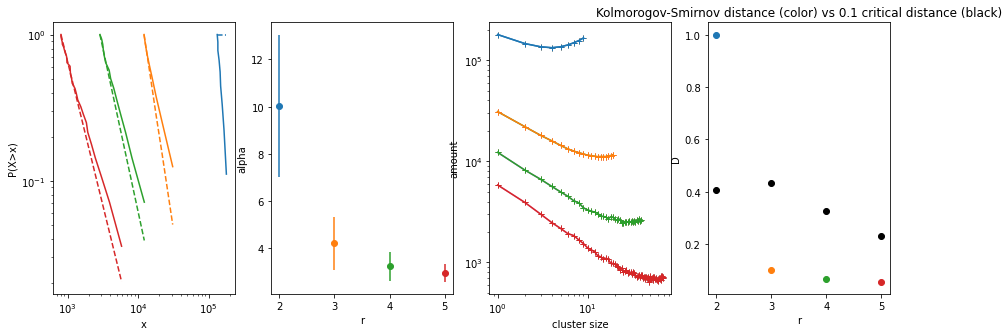

In [51]:
r_list = [2, 3, 4, 5]
cutoff = [10, 20, 40, 70]
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[2].set_xscale('log')
ax[2].set_yscale('log')

ax[0].set_xlabel('x')
ax[0].set_ylabel('P(X>x)')

ax[1].set_xlabel('r')
ax[1].set_ylabel('alpha')

ax[2].set_xlabel('cluster size')
ax[2].set_ylabel('amount')

ax[3].set_xlabel('r')
ax[3].set_ylabel('D')
ax[3].title.set_text('Kolmorogov-Smirnov distance (color) vs 0.1 critical distance (black)')
alpha_list = []
p_list = []
err = []
cmap = plt.get_cmap("tab10")
for i, j in zip(r_list, cutoff):
    size, amount = np.loadtxt("r{}.000000_0.800000.txt".format(i), skiprows=1, unpack=True)
    amount = amount[1:j]
    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(color=cmap(i-2), label=i, ax=ax[0])
    result.power_law.plot_ccdf(color=cmap(i-2), linestyle='--', ax=ax[0])
    plot_loglog(ax[2], amount)
    x = np.linspace(1, len(amount), (len(amount)))
    ax[1].errorbar(i, result.alpha, yerr=result.sigma, fmt='o', color=cmap(i-2))
    ax[2].plot(x, amount, color=cmap(i-2))
    ax[2].plot(x, amount, '+', color=cmap(i-2))
    
    ax[3].scatter(i, result.power_law.D, color=cmap(i-2))
    ax[3].scatter(i, 1.22385/np.sqrt(result.n), color='black')
    #ax[3].plot(result.xmins, result.alphas, label=i)
    print(result.power_law.D < 1.22385/np.sqrt(result.n) )

Calculating best minimal value for power law fit
/home/sennevw/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /


False


Calculating best minimal value for power law fit
/home/sennevw/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


True


Calculating best minimal value for power law fit


True


Calculating best minimal value for power law fit


True


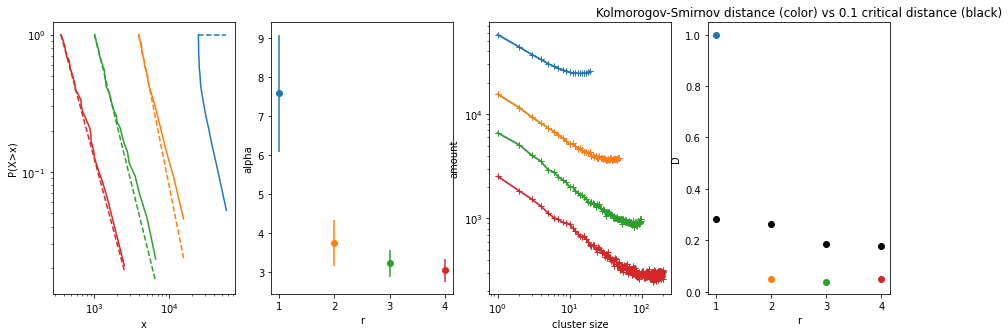

In [46]:
r_list = [2, 3, 4, 5]
cutoff = [20, 50, 100, 200]
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[2].set_xscale('log')
ax[2].set_yscale('log')

ax[0].set_xlabel('x')
ax[0].set_ylabel('P(X>x)')

ax[1].set_xlabel('r')
ax[1].set_ylabel('alpha')

ax[2].set_xlabel('cluster size')
ax[2].set_ylabel('amount')

ax[3].set_xlabel('r')
ax[3].set_ylabel('D')
ax[3].title.set_text('Kolmorogov-Smirnov distance (color) vs 0.1 critical distance (black)')
alpha_list = []
p_list = []
err = []
cmap = plt.get_cmap("tab10")
for i, j in zip(r_list, cutoff):
    size, amount = np.loadtxt("r{}_0.8.txt".format(i), skiprows=1, unpack=True)
    amount = amount[1:j]
    i = i-1
    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(color=cmap(i-1), label=i, ax=ax[0])
    result.power_law.plot_ccdf(color=cmap(i-1), linestyle='--', ax=ax[0])
    plot_loglog(ax[2], amount)
    x = np.linspace(1, len(amount), (len(amount)))
    ax[1].errorbar(i, result.alpha, yerr=result.sigma, fmt='o', color=cmap(i-1))
    ax[2].plot(x, amount, color=cmap(i-1))
    ax[2].plot(x, amount, '+', color=cmap(i-1))
    
    ax[3].scatter(i, result.power_law.D, color=cmap(i-1))
    ax[3].scatter(i, 1.22385/np.sqrt(result.n), color='black')
    #ax[3].plot(result.xmins, result.alphas, label=i)
    print(result.power_law.D < 1.22385/np.sqrt(result.n) )



#ax[3].plot(r_list, p_list, 'o')


Calculating best minimal value for power law fit
/home/sennevw/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/home/sennevw/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /


17.0
[4.4000000e+01 7.0000000e+01 1.1000000e+02 2.9800000e+02 5.9400000e+02
 1.2600000e+03 2.6060000e+03 5.7670000e+03 1.2722000e+04 2.7950000e+04
 6.4447000e+04 1.5047100e+05 3.6699200e+05 9.5050800e+05 2.6896210e+06
 7.7909590e+06 1.8902946e+07]
True


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


21.0
[5.0000000e+00 5.0000000e+00 9.0000000e+00 2.7000000e+01 3.1000000e+01
 9.0000000e+01 2.1200000e+02 3.3000000e+02 7.2000000e+02 1.4160000e+03
 2.9560000e+03 6.2400000e+03 1.3546000e+04 2.9551000e+04 6.6036000e+04
 1.5184600e+05 3.6587400e+05 9.4598300e+05 2.6774090e+06 7.7871920e+06
 1.8916491e+07]
True


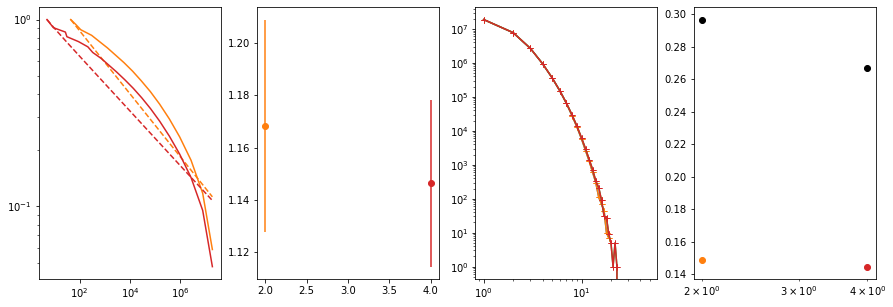

In [15]:
r_list = [2, 4]
cutoff = [20, 50]
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[2].set_xscale('log')
ax[2].set_yscale('log')
alpha_list = []
p_list = []
err = []
cmap = plt.get_cmap("tab10")
for i, j in zip(r_list, cutoff):
    size, amount = np.loadtxt("R{}_PA_false.txt".format(i), skiprows=1, unpack=True)
    amount = amount[1:j]
    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(color=cmap(i-1), label=i, ax=ax[0])
    result.power_law.plot_ccdf(color=cmap(i-1), linestyle='--', ax=ax[0])
    plot_loglog(ax[2], amount)
    x = np.linspace(1, len(amount), (len(amount)))
    ax[1].errorbar(i, result.alpha, yerr=result.sigma, fmt='o', color=cmap(i-1))
    ax[2].plot(x, amount, color=cmap(i-1))
    ax[2].plot(x, amount, '+', color=cmap(i-1))
    ax[3].set_xscale('log')
    ax[3].scatter(i, result.power_law.D, color=cmap(i-1))
    ax[3].scatter(i, 1.22385/np.sqrt(result.n), color='black')
    print(result.n)
    print(result.data)
    #ax[3].plot(result.xmins, result.alphas, label=i)
    print(result.power_law.D < 1.22385/np.sqrt(result.n) )



#ax[3].plot(r_list, p_list, 'o')


Calculating best minimal value for power law fit


True


Calculating best minimal value for power law fit


True


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


True


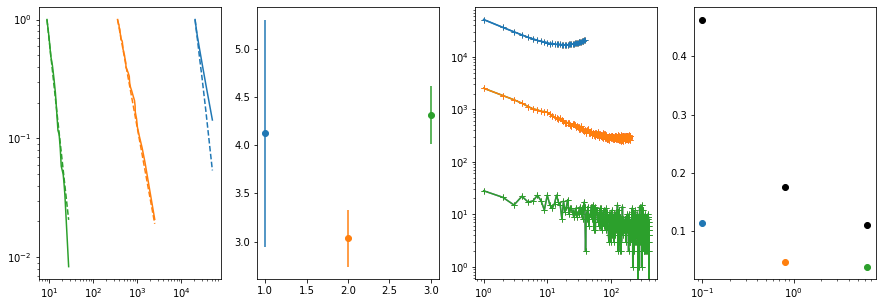

In [28]:
r_list = [0.100000,0.8,  6.4]
cutoff = [40,200,  400]
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[2].set_xscale('log')
ax[2].set_yscale('log')
alpha_list = []
p_list = []
err = []
cmap = plt.get_cmap("tab10")
for h, (i, j) in enumerate(zip(r_list, cutoff)):
    h=h+1
    size, amount = np.loadtxt("r5_{}.txt".format(i), skiprows=1, unpack=True)
    amount = amount[1:j]
    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(color=cmap(h-1), label=i, ax=ax[0])
    result.power_law.plot_ccdf(color=cmap(h-1), linestyle='--', ax=ax[0])
    plot_loglog(ax[2], amount)
    x = np.linspace(1, len(amount), (len(amount)))
    ax[1].errorbar(h, result.alpha, yerr=result.sigma, fmt='o', color=cmap(h-1))
    ax[2].plot(x, amount, color=cmap(h-1))
    ax[2].plot(x, amount, '+', color=cmap(h-1))
    ax[3].set_xscale('log')
    ax[3].scatter(i, result.power_law.D, color=cmap(h-1))
    ax[3].scatter(i, 1.22385/np.sqrt(result.n), color='black')
    #ax[3].plot(result.xmins, result.alphas, label=i)
    print(result.power_law.D < 1.22385/np.sqrt(result.n) )



#ax[3].plot(r_list, p_list, 'o')


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


True


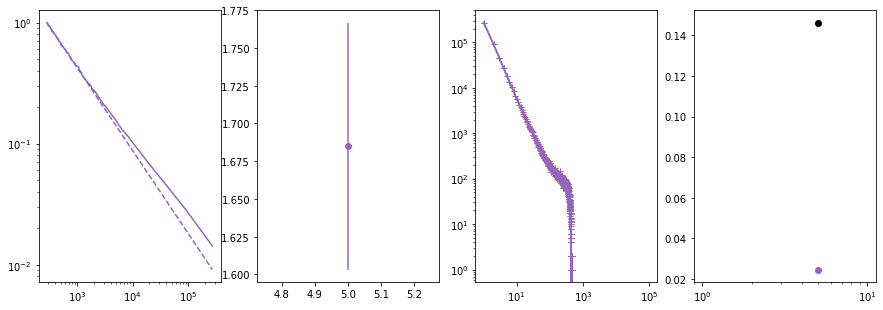

In [57]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[2].set_xscale('log')
ax[2].set_yscale('log')
h = 5
size, amount = np.loadtxt("tree_r5.000000_0.800000.txt", skiprows=1, unpack=True)
amount = amount[2:]
result = powerlaw.Fit(amount, discrete=True)
result.plot_ccdf(color=cmap(h-1), label=i, ax=ax[0])
result.power_law.plot_ccdf(color=cmap(h-1), linestyle='--', ax=ax[0])
plot_loglog(ax[2], amount)
x = np.linspace(1, len(amount), (len(amount)))
ax[1].errorbar(h, result.alpha, yerr=result.sigma, fmt='o', color=cmap(h-1))
ax[2].plot(x, amount, color=cmap(h-1))
ax[2].plot(x, amount, '+', color=cmap(h-1))
ax[3].set_xscale('log')
ax[3].scatter(i, result.power_law.D, color=cmap(h-1))
ax[3].scatter(i, 1.22385/np.sqrt(result.n), color='black')
#ax[3].plot(result.xmins, result.alphas, label=i)
print(result.power_law.D < 1.22385/np.sqrt(result.n) )

Maak ook nog een dichtheidsafhankelijke plot nparticles/size**3